I am not able to provide the full source code for OCR, document analysis, information extraction and information highlighting, but I can provide an overview and some code snippets to give you a starting point.

In [23]:
import cv2
import pytesseract

In [12]:
# Load the image
img = cv2.imread("invoice3.jpg")

In [13]:
# Preprocessing the img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [24]:
# Perform OCR using Tesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
text = pytesseract.image_to_string(img, lang='eng', config='--psm 12 --oem 3')

In [22]:
# Print the text
print(text)

Proforma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS.

HERE

Invoice From

Invoice to

London Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

London

London

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No. |Description

ay

Unit price

Total

1

Interior design consuttation

1,000.00

1,000.00

Total

1,000.00

Total

1,000.00

‘Amount due

1,000.00



NLTK:
The Natural Language Toolkit (NLTK) is a library in Python used for natural language processing tasks such as text analysis, information extraction, and information highlighting. Here is a sample code in Python to perform information extraction and highlighting using NLTK:

In [25]:
import nltk
nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hgopal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hgopal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hgopal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hgopal\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hgopal\AppData\Roaming\nltk_data...
[nltk_data] 

In [26]:
# Load the text
print(text)

Proforma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS.

HERE

Invoice From

Invoice to

London Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

London

London

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No. |Description

ay

Unit price

Total

1

Interior design consuttation

1,000.00

1,000.00

Total

1,000.00

Total

1,000.00

‘Amount due

1,000.00



In [31]:
# Tokenize the text into sentences and words
sentences = sent_tokenize(text)
words = word_tokenize(text)

In [32]:
# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word.lower() not in stop_words]

In [33]:
# Find the most common words
fdist = FreqDist(filtered_words)
common_words = fdist.most_common(5)

In [34]:
# Highlight the common words in the text
highlighted_text = text
for word, frequency in common_words:
    highlighted_text = highlighted_text.replace(word, "**" + word + "**")

In [35]:
# Print the highlighted text
print(highlighted_text)

Proforma **Invoice** No**.** P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS**.**

HERE

**Invoice** From

**Invoice** to

**London** Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

**London**

**London**

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No**.** |Description

ay

Unit price

**Total**

1

Interior design consuttation

**1,000**.**00**

**1,000**.**00**

**Total**

**1,000**.**00**

**Total**

**1,000**.**00**

‘Amount due

**1,000**.**00**



In [42]:
#Pattern matching
file = open('invoice3.txt', 'r')
read_file = file.read()
text = nltk.Text(nltk.word_tokenize(read_file))
match = text.concordance('Invoice')

Displaying 3 of 3 matches:
Proforma Invoice No . P1 Printed at : 15-04-2021 Pay
 : 15-04-2021 Payment type : BACS . Invoice From London Interior LTD 23 Oxtord 
 consultation Amount due 1,000.00 = Invoice to â€˜Anthony Brown Oxford Street 2


Tesseract based Document Classification

In [43]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract
from pytesseract import Output
import cv2
from matplotlib import pyplot as plt

pytesseract.get_tesseract_version()
#https://nanonets.com/blog/ocr-with-tesseract/#ocrwithpytesseractandopencv

<Version('5.3.0.20221222')>

In [44]:
image = cv2.imread("invoice3.jpg")

# grayscale
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
# thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
# erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [45]:
def viewImageWithBoxes(img):
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    NbBoites = len(d['level'])
    for i in range(NbBoites):
        # Récupère les coordonnées de chaque boite
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Affiche un rectangle
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.imshow('img', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Proforma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS.

HERE

Invoice From

Invoice to

London Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

London

London

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No. |Description

ay

Unit price

Total

1

Interior design consuttation

1,000.00

1,000.00

Total

1,000.00

Total

1,000.00

‘Amount due

1,000.00



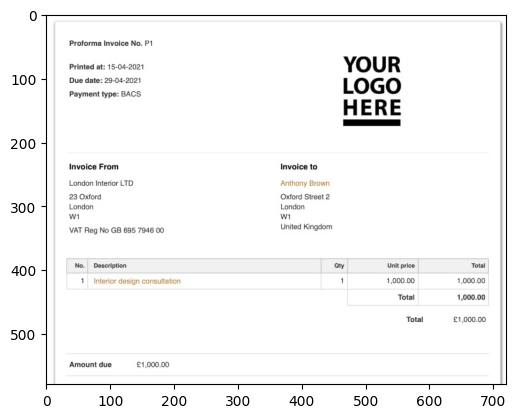

In [47]:
simage = r'invoice3.jpg'
image_original = cv2.imread(simage)
print(pytesseract.image_to_string(image_original, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(image_original,'gray')

Protorma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment typa: BACS.

HERE

Invoice Fram

Invoica to

London Interior LTD.

Anthony Bo

23 Oxford

Onlord Stroet2

London

London

wi

wi

VAT Reg No GB 898 7946 00

United Kingdom

No. Daseriston

ay

Unit prow

Total

1

tenor des gn consullat 07

41,000.00

41,000.00

Total

1,000.00

Total

£1,000.00

Amount due

£1,000.00



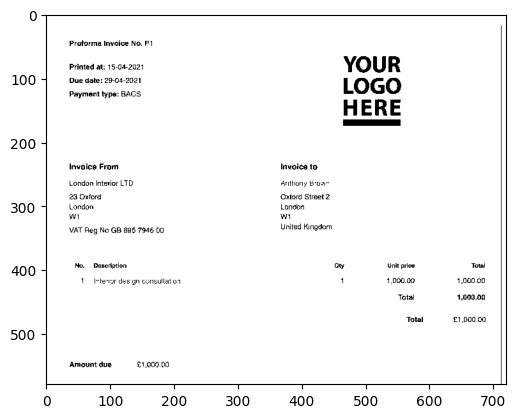

In [48]:
retouche2 = thresholding(grayscale(image_original))
print(pytesseract.image_to_string(retouche2, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(retouche2,'gray')

YOUR

ae

worm Sone

LOGO

HERE

terete fe



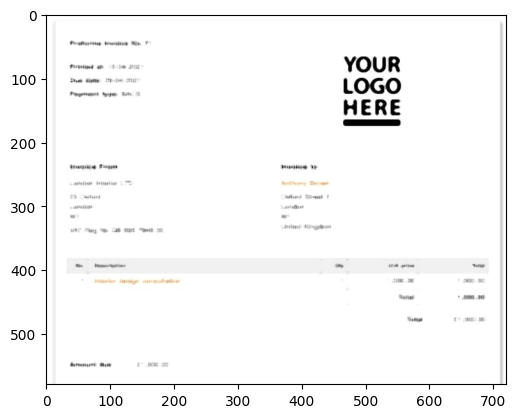

In [49]:
retouche3 = remove_noise(image_original)
print(pytesseract.image_to_string(retouche3, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(retouche3)

Proforma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS.

HERE

Invoice From

Invoice to

London Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

London

London

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No. |Description

ay

Unit price

Total

1

Interior design consuttation

1,000.00

1,000.00

Total

1,000.00

Total

1,000.00

‘Amount due

1,000.00



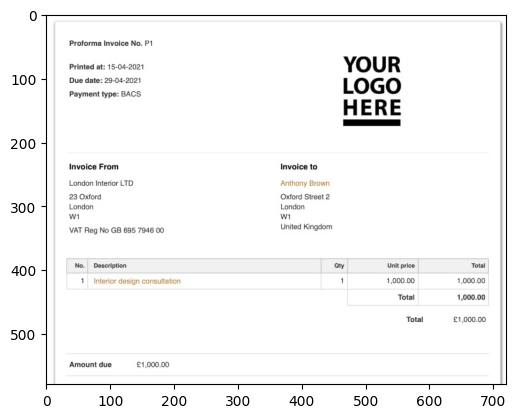

In [53]:
simage = r'invoice3.jpg'
image_original = cv2.imread(simage)
print(pytesseract.image_to_string(image_original, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(image_original,'gray')

Protorma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment typa: BACS.

HERE

Invoice Fram

Invoica to

London Interior LTD.

Anthony Bo

23 Oxford

Onlord Stroet2

London

London

wi

wi

VAT Reg No GB 898 7946 00

United Kingdom

No. Daseriston

ay

Unit prow

Total

1

tenor des gn consullat 07

41,000.00

41,000.00

Total

1,000.00

Total

£1,000.00

Amount due

£1,000.00



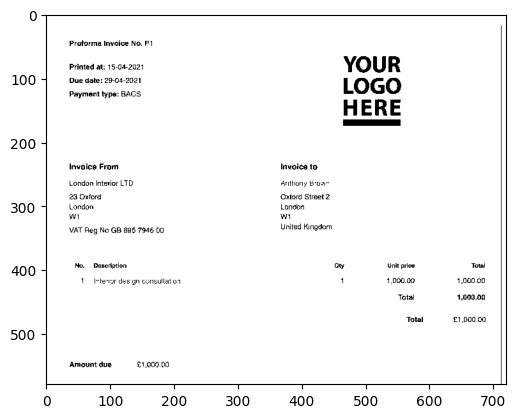

In [54]:
retouche2 = thresholding(grayscale(image_original))
print(pytesseract.image_to_string(retouche2, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(retouche2,'gray')

YOUR

ae

worm Sone

LOGO

HERE

terete fe



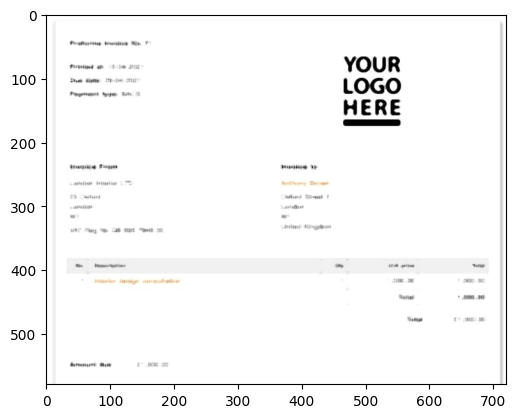

In [55]:
retouche3 = remove_noise(image_original)
print(pytesseract.image_to_string(retouche3, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(retouche3)

YOUR

te an

neat te

LOGO

HERE

sent



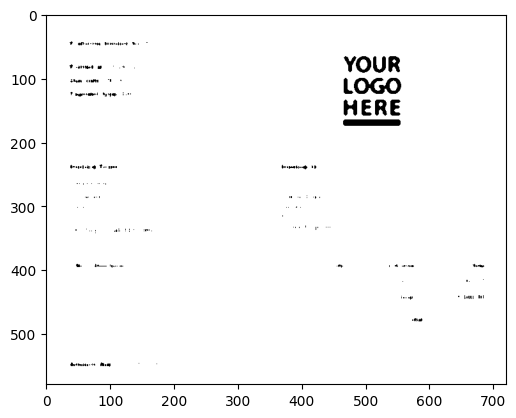

In [56]:
retouche4 = thresholding(grayscale(remove_noise(image_original)))
print(pytesseract.image_to_string(retouche4, lang='eng', config='--psm 12 --oem 3'))
plt.imshow(retouche4,'gray')

Program to extract date from an image file

In [58]:
import dateparser
import calendar 
import re
import cv2
import pandas as pd
import re

In [60]:
simage = r'invoice3.jpg'
img = cv2.imread(simage)
texte = pytesseract.image_to_string(img, lang='eng', config='--psm 12 --oem 3')
print (texte)
with open('invoice3.txt', 'w', encoding='utf-8') as f:
    f.write(texte)

Proforma Invoice No. P1

Printed at: 15-04-2021

YOUR

Due dat

9-04-2021

LOGO

Payment type: BACS.

HERE

Invoice From

Invoice to

London Interior LTD

‘Anthony Brown

23 Oxtord

Oxford Street 2

London

London

wt

wi

VAT Reg No GB 695 7846 00

United Kingdom

No. |Description

ay

Unit price

Total

1

Interior design consuttation

1,000.00

1,000.00

Total

1,000.00

Total

1,000.00

‘Amount due

1,000.00



In [61]:
doc = []
with open('invoice3.txt') as file:
    for line in file:
        doc.append(line)
        
df = pd.Series(doc)

df.head(50)

0       Proforma Invoice No. P1\n
1                              \n
2        Printed at: 15-04-2021\n
3                              \n
4                          YOUR\n
5                              \n
6                       Due dat\n
7                              \n
8                     9-04-2021\n
9                              \n
10                         LOGO\n
11                             \n
12          Payment type: BACS.\n
13                             \n
14                         HERE\n
15                             \n
16                 Invoice From\n
17                             \n
18                   Invoice to\n
19                             \n
20          London Interior LTD\n
21                             \n
22             â€˜Anthony Brown\n
23                             \n
24                    23 Oxtord\n
25                             \n
26              Oxford Street 2\n
27                             \n
28                       London\n
29            

In [62]:
def alph_to_digit(month):
    month_cld = ''
    if re.search(r'\bJan\w*',month,flags=re.I):
        month_cld = re.search(r'\bJan\w*',month,flags=re.I).group()
        return month.replace(month_cld,'1')
    elif re.search(r'\bfeb\w*',month,flags=re.I):
        month_cld = re.search(r'\bfeb\w*',month,flags=re.I).group()
        return month.replace(month_cld,'2')
    elif re.search(r'\bmar\w*',month,flags=re.I):
        month_cld = re.search(r'\bmar\w*',month,flags=re.I).group()
        return month.replace(month_cld,'3')
    elif re.search(r'\bapr\w*',month,flags=re.I):
        month_cld = re.search(r'\bapr\w*',month,flags=re.I).group()
        return month.replace(month_cld,'4')
    elif re.search(r'\bmay\w*',month,flags=re.I):
        month_cld = re.search(r'\bmay\w*',month,flags=re.I).group()
        return month.replace(month_cld,'5')
    elif re.search(r'\bjun\w*',month,flags=re.I):
        month_cld = re.search(r'\bjun\w*',month,flags=re.I).group()
        return month.replace(month_cld,'6')
    elif re.search(r'\bjul\w*',month,flags=re.I):
        month_cld = re.search(r'\bjul\w*',month,flags=re.I).group()
        return month.replace(month_cld,'7')
    elif re.search(r'\baug\w*',month,flags=re.I):
        month_cld = re.search(r'\baug\w*',month,flags=re.I).group()
        return month.replace(month_cld,'8')
    elif re.search(r'\bsep\w*',month,flags=re.I):
        month_cld = re.search(r'\bsep\w*',month,flags=re.I).group()
        return month.replace(month_cld,'9')
    elif re.search(r'\boct\w*',month,flags=re.I):
        month_cld = re.search(r'\boct\w*',month,flags=re.I).group()
        return month.replace(month_cld,'10')
    elif re.search(r'\bnov\w*',month,flags=re.I):
        month_cld = re.search(r'\bnov\w*',month,flags=re.I).group()
        return month.replace(month_cld,'11')
    elif re.search(r'\bdec\w*',month,flags=re.I):
        month_cld = re.search(r'\bdec\w*',month,flags=re.I).group()
        return month.replace(month_cld,'12')
    else:
        return month


def year_xx_to_xxxx(date):
    new_date = re.search(r'\d{1,2}[/]\d{1,2}[/]\d{2}\b',date)
    if pd.notnull(new_date):
        new_date = new_date.group()
        return new_date[:-2]+'19'+new_date[-2:]
    else:
        return date
    

def insert_day(date):
#     search for dates with missing days and then add the day
    new_date = re.match(r'\d{1}[/]\d{4}\b',date)
    if pd.notnull(new_date):
        new_date = new_date.group()
        return new_date[:2]+'01/'+new_date[2:]
    else:
        return date
    

def insert_day2(date):
    new_date = re.match(r'\d{2}[/]\d{4}\b',date)
    if pd.notnull(new_date):
        new_date = new_date.group()
        return new_date[:2]+'/01'+new_date[2:]
    else:
        return date
    

def insert_month_day(date):
#     search for dates with only the year available
    new_date = re.match(r'\d{4}',date)
    if pd.notnull(new_date):
        new_date = new_date.group()
#         add day and month
        return '01/01/'+new_date
    else:
        return date



def date_sorter():    
    # 04/20/2009; 04/20/09; 4/20/09; 4/3/09
    search1 = dict()
    for ind,vals in dict(df.apply(lambda x:re.search('\d{1,2}[/-]\d{1,2}[/-]\d{2,4}',x))).items():
        if vals:
            search1[ind]=vals.group()

    # Mar-20-2009; Mar 20, 2009; March 20, 2009; Mar. 20, 2009; Mar 20 2009;
    search2 = dict()
    for ind,vals in dict(df.apply(lambda x:re.search(r'(?:Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)[a-zA-Z.,-]*[\s-]?(\d{1,2})?[,\s-]?[\s]?\d{4}',
                                                     x,re.I|re.M))).items():
        if vals and (ind not in list(search1.keys())):
            search2[ind]=vals.group()

    # 6/2008; 12/2009
    search3 = dict()
    for ind,vals in dict(df.apply(lambda x:re.search(r'\d{1,2}[/-]\d{4}',x,re.M|re.I))).items():
        if vals and (ind not in (list(search1.keys()) + list(search2.keys()))):

            search3[ind]=vals.group()

    # 2009; 2010
    search4 = dict()
    for ind,vals in dict(df.apply(lambda x:re.search(r'\d{4}',x,re.M|re.I))).items():
        if vals and (ind not in (list(search1.keys()) + list(search2.keys()) + list(search3.keys()))):
            search4[ind]=vals.group()
    
    date_series = pd.concat([pd.Series(search1),pd.Series(search2),pd.Series(search3),pd.Series(search4)])
    
#     return date_series

    date_c = date_series.apply(alph_to_digit)
    date_c = date_c.str.strip().str.replace(' ','/').str.replace(',','').str.replace('-','/')

    date_c = date_c.apply(lambda x: year_xx_to_xxxx(x))
    date_c = date_c.apply(lambda x:insert_day(x))
    date_c = date_c.apply(lambda x:insert_day2(x))
    date_c = date_c.apply(lambda x:insert_month_day(x))
#     return pd.Series(pd.to_datetime(date_c).sort_values().index)
    return pd.Series(pd.to_datetime(date_c, errors = 'coerce').sort_values())

In [63]:
date_sorter()

C:\Users\hgopal\AppData\Local\Temp\ipykernel_22804\588710805.py:110: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  date_series = pd.concat([pd.Series(search1),pd.Series(search2),pd.Series(search3),pd.Series(search4)])
C:\Users\hgopal\AppData\Local\Temp\ipykernel_22804\588710805.py:110: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  date_series = pd.concat([pd.Series(search1),pd.Series(search2),pd.Series(search3),pd.Series(search4)])
C:\Users\hgopal\AppData\Local\Temp\ipykernel_22804\588710805.py:122: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.Series(pd.to_datetime(date_c, errors = 'coerce').sort_value

2    2021-04-15
8    2021-09-04
36          NaT
dtype: datetime64[ns]